In [1]:
import pandas as pd
import numpy as np
import sys
import os
import matplotlib.pyplot as plt
from dplython import *
from scipy.stats import linregress
from IPython.display import Image
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import Normalize
import matplotlib
import matplotlib.cm as cm
import seaborn as sns
from matplotlib import rcParams
from netCDF4 import Dataset
import struct
import binascii
from mpl_toolkits.basemap import addcyclic
from netCDF4 import num2date, date2num, date2index
import datetime
from pyhdf.SD import SD, SDC
import h5py
import glob
import math

C:\Users\hahw9\Anaconda3\envs\cuda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\hahw9\Anaconda3\envs\cuda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\hahw9\Anaconda3\envs\cuda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\hahw9\Anaconda3\envs\cuda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
#total_GFED4_data = pd.read_csv('/home/seohyunwoo/wild_code/wildfireGFED4.0_total_data.csv')
# 만들었던 csv파일 불러오기
save_file_path = '/home/seohyunwoo/wild_code/wildfire/'
# 파일을 저장할 경로 입력

In [3]:
total_GFED4_data = pd.read_csv('C:/Users/hahw9/For Coding/Model/hdf5/GFED4.1_total_data.csv')

save_file_path = 'C:/users/hahw9/For Coding/Model/hdf5/result/'

In [4]:
total_GFED4_data.head()

,Unnamed: 0,lon,lat,0,1,2,3,4,5,6,...,182,183,184,185,186,187,188,189,190,191
0,0,-179.875,89.875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,-179.625,89.875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,-179.375,89.875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,-179.125,89.875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,-178.875,89.875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# 파일을 저장할 경로 입력

month_label_list = []
for year in range(2001,2017):
    for month in range(1,13):
        month_label_list.append(str(year) +" / "+ str(month) +" - Burned Fraction")


file_name_list = []
for year in range(2001,2017):
    for month in range(1,13):
        file_name_list.append(str(year) +"_"+ str(month) +"_Burned Fraction")

year_label_list = []
for year in range(2001,2017):
    year_label_list.append(str(year) +" - Burned Fraction(Year)")


year_file_name_list = []
for year in range(2001,2017):
    year_file_name_list.append("(Year)"+str(year) + "_Burned Fraction(Year)")



temp_season = ["MAM","JJA","SON","DJF"]
temp_season_17 = temp_season*17
season_label_list = []
year = 2001

for count in range(1,68):
    if (count % 4 == 0) & (count != 0):
        season_label_list.append(str(year) + "~" + str(year+1) + " / " + temp_season_17[count-1] + " - Burned Fraction")
        year += 1
    else:
        season_label_list.append(str(year) + " / " + temp_season_17[count-1] + " - Burned Fraction")

year = 2001
season_file_name_list = []
for count in range(1,68):
    if (count % 4 == 0) & (count != 0):
        season_file_name_list.append("(Season)"+str(year) + "_" + str(year+1) + "_" + temp_season_17[count-1])
        year += 1
    else:
        season_file_name_list.append("(Season)"+str(year) + "_" + temp_season_17[count-1])
        
        
temp_season = ["MAM","JJA","SON","DJF"]
temp_season = temp_season
total_season_label_list = []

for count in range(4):
    total_season_label_list.append("Total " + temp_season[count] + " - Burned Fraction(Average)")

year = 2001
total_season_file_name_list = []
for count in range(4):
    total_season_file_name_list.append("Total""_" + temp_season[count])
        

def makes_seasonal_list(data_type):
    season_data_list = []
    for x in data_type:
        season_data_list += [i for i in range(x+5,x+8)]
    return season_data_list

MAM = [i for i in range(0,192,12)]
JJA = [i for i in range(3,192,12)]
SON = [i for i in range(6,192,12)]
DJF = [i for i in range(9,189,12)]

MAM_list = makes_seasonal_list(MAM)
JJA_list = makes_seasonal_list(JJA)
SON_list = makes_seasonal_list(SON)
DJF_list = makes_seasonal_list(DJF)
total_seasonal_list = [MAM_list, JJA_list, SON_list, DJF_list]

In [6]:
def draw_plot(result_data, title, label, save_file_name, num):
    result_data = result_data[result_data[str(num-3)] != 0]
    target_data = result_data[str(num-3)]
    plt.figure(figsize = (23, 8))
    #plt.style.use('seaborn-darkgrid')
    plt.rc("font", size = 15)
    plt.rcParams['font.family'] = 'Times New Roman'
    m = Basemap(projection='cyl', lon_0 = 0, lat_0 = 40,
    llcrnrlon = 0, llcrnrlat = 40,
    urcrnrlon = 180, urcrnrlat = 80,
    resolution = 'c')
    print(np.array(target_data).max())
    X, Y = m(result_data.lon.values, result_data.lat.values)

    VAL = target_data.values
    # cmap_color = 'Purples'
    m.scatter(X, Y, c = VAL, s = 1.0, marker = "s", zorder = 1, vmin = 0, vmax = 0.05, cmap = plt.cm.get_cmap('jet'), alpha = 1.0)
    m.colorbar(location='bottom', label = label, pad = 0.5)
    m.drawcoastlines(color = 'black')
    m.drawcountries(color = 'black')
    m.drawmapboundary(fill_color = 'white')
    m.drawparallels(np.arange(-150,120,10), labels=[1,0,0,0])
    m.drawmeridians(np.arange(-180,180,30), labels=[0,0,0,1])
    plt.title(title + "\n")
    fig = plt.gcf()
    plt.savefig(save_file_path + save_file_name , dpi=300)


def draw_plot_yearly(result_data, title, label, save_file_name, x):
    lon_lat_df = total_GFED4_data.iloc[:,[1,2]]
    year_data_list = [i for i in range(12*x+3,12*x+15)]
    count_year = year_data_list
    df = total_GFED4_data.iloc[:,count_year]
    new_df = df.sum(axis=1)
    new_df_array = np.array(new_df)
    print(new_df_array.max())
    new_df = new_df
    new_df = new_df

    lon_lat_df['0'] = new_df
    result_data = lon_lat_df
    print(result_data.head())
    result_data = result_data[result_data[str(0)] != 0]
    target_data = result_data[str(0)]

    plt.figure(figsize = (23, 8))
    #plt.style.use('seaborn-darkgrid')
    plt.rc("font", size = 15)
    plt.rcParams['font.family'] = 'Times New Roman'
    m = Basemap(projection='cyl', lon_0 = 0, lat_0 = 40,
    llcrnrlon = 0, llcrnrlat = 40,
    urcrnrlon = 180, urcrnrlat = 80,
    resolution = 'c')
    X, Y = m(result_data.lon.values, result_data.lat.values)

    VAL = target_data.values
    # cmap_color = 'Purples'
    m.scatter(X, Y, c = VAL, s = 1.0, marker = "s", zorder = 1, vmin = 0, vmax = 1, cmap = plt.cm.get_cmap('jet'), alpha = 1.0)
    m.colorbar(location='bottom', label = label, pad = 0.5)
    m.drawcoastlines(color = 'black')
    m.drawcountries(color = 'black')
    m.drawmapboundary(fill_color = 'white')
    m.drawparallels(np.arange(-150,120,10), labels=[1,0,0,0])
    m.drawmeridians(np.arange(-180,180,30), labels=[0,0,0,1])
    plt.title(title + "\n")
    fig = plt.gcf()
    plt.savefig(save_file_path + save_file_name , dpi=300)



def draw_plot_seasonly(result_data, title, label, save_file_name, x):
    lon_lat_df = total_GFED4_data.iloc[:,[1,2]]
    season_data_list = [i for i in range(3*x+5,3*x+8)]
    count_season = season_data_list
    df = total_GFED4_data.iloc[:,count_season]
    new_df = df.sum(axis=1)
    new_df = new_df

    lon_lat_df['0'] = new_df
    result_data = lon_lat_df
    result_data = result_data[result_data[str(0)] != 0]
    target_data = result_data[str(0)]

    plt.figure(figsize = (23, 8))
    #plt.style.use('seaborn-darkgrid')
    plt.rc("font", size = 15)
    plt.rcParams['font.family'] = 'Times New Roman'
    m = Basemap(projection='cyl', lon_0 = 0, lat_0 = 40,
    llcrnrlon = 0, llcrnrlat = 40,
    urcrnrlon = 180, urcrnrlat = 80,
    resolution = 'c')
    X, Y = m(result_data.lon.values, result_data.lat.values)

    VAL = target_data.values
    # cmap_color = 'Purples'
    m.scatter(X, Y, c = VAL, s = 1.0, marker = "s", zorder = 1, vmin = 0, vmax = 0.2, cmap = plt.cm.get_cmap('jet'), alpha = 1.0)
    m.colorbar(location='bottom', label = label, pad = 0.5)
    m.drawcoastlines(color = 'black')
    m.drawcountries(color = 'black')
    m.drawmapboundary(fill_color = 'white')
    m.drawparallels(np.arange(-150,120,10), labels=[1,0,0,0])
    m.drawmeridians(np.arange(-180,180,30), labels=[0,0,0,1])
    plt.title(title + "\n")
    fig = plt.gcf()
    plt.savefig(save_file_path + save_file_name , dpi=300)
    
    
    
def draw_plot_total_seasonly(result_data, season_list,title, label, save_file_name,x):
    lon_lat_df = total_GFED4_data.iloc[:,[1,2]]
    df = total_GFED4_data.iloc[:,season_list]
    new_df = df.sum(axis=1)
    
    if x == 3:
        new_df = new_df/15
    else:
        new_df = new_df/16
        
    lon_lat_df['0'] = new_df
    result_data = lon_lat_df
    result_data = result_data[result_data[str(0)] != 0]
    target_data = result_data[str(0)]

    plt.figure(figsize = (23, 8))
    #plt.style.use('seaborn-darkgrid')
    plt.rc("font", size = 15)
    plt.rcParams['font.family'] = 'Times New Roman'
    m = Basemap(projection='cyl', lon_0 = 0, lat_0 = 40,
    llcrnrlon = 0, llcrnrlat = 40,
    urcrnrlon = 180, urcrnrlat = 80,
    resolution = 'c')
    X, Y = m(result_data.lon.values, result_data.lat.values)

    VAL = target_data.values
    # cmap_color = 'Purples'
    m.scatter(X, Y, c = VAL, s = 1.0, marker = "s", zorder = 1, vmin = 0, vmax = 0.05, cmap = plt.cm.get_cmap('jet'), alpha = 1.0)
    m.colorbar(location='bottom', label = label, pad = 0.5)
    m.drawcoastlines(color = 'black')
    m.drawcountries(color = 'black')
    m.drawmapboundary(fill_color = 'white')
    m.drawparallels(np.arange(-150,120,10), labels=[1,0,0,0])
    m.drawmeridians(np.arange(-180,180,30), labels=[0,0,0,1])
    plt.title(title + "\n")
    fig = plt.gcf()
    plt.savefig(save_file_path + save_file_name , dpi=300)
    

        
        
def draw_plot_total(result_data, title, label, save_file_name):
    lon_lat_df = total_GFED4_data.iloc[:,[1,2]]
    year_data_list = [i for i in range(3,195)]
    count_year = year_data_list
    df = total_GFED4_data.iloc[:,count_year]
    new_df = df.sum(axis=1)
    new_df_array = np.array(new_df)
    print(new_df_array.max())
    new_df = new_df

    lon_lat_df['0'] = new_df
    result_data = lon_lat_df
    print(result_data.head())
    result_data = result_data[result_data[str(0)] != 0]
    target_data = result_data[str(0)]

    plt.figure(figsize = (23, 8))
    #plt.style.use('seaborn-darkgrid')
    plt.rc("font", size = 15)
    plt.rcParams['font.family'] = 'Times New Roman'
    m = Basemap(projection='cyl', lon_0 = 0, lat_0 = 40,
    llcrnrlon = 0, llcrnrlat = 40,
    urcrnrlon = 180, urcrnrlat = 80,
    resolution = 'c')
    X, Y = m(result_data.lon.values, result_data.lat.values)

    VAL = target_data.values
    # cmap_color = 'Purples'
    m.scatter(X, Y, c = VAL, s = 1.0, marker = "s", zorder = 1, vmin = 0, vmax = 1, cmap = plt.cm.get_cmap('jet'), alpha = 1.0)
    m.colorbar(location='bottom', label = label, pad = 0.5)
    m.drawcoastlines(color = 'black')
    m.drawcountries(color = 'black')
    m.drawmapboundary(fill_color = 'white')
    m.drawparallels(np.arange(-150,120,10), labels=[1,0,0,0])
    m.drawmeridians(np.arange(-180,180,30), labels=[0,0,0,1])
    plt.title(title + "\n")
    fig = plt.gcf()
    plt.savefig(save_file_path + save_file_name , dpi=300)

In [7]:
def extract_monthly():
    for num in range(3,195):
        draw_plot(total_GFED4_data.iloc[:,[1,2,num]], month_label_list[num-3], "Burned Fraction" ,file_name_list[num-3], num)
        
def extract_yearly():
    for x in range(16):
        draw_plot_yearly(total_GFED4_data, year_label_list[x], "Sum of Burned Fraction" ,year_file_name_list[x], x)

def extract_seasonly():
    for x in range(63):
        draw_plot_seasonly(total_GFED4_data, season_label_list[x], "Sum of Burned Fraction" ,season_file_name_list[x], x)
        
def extract_total_seasonly():
    for x in range(4):
        draw_plot_total_seasonly(total_GFED4_data, total_seasonal_list[x],total_season_label_list[x], "Sum of Burned Fraction" ,total_season_file_name_list[x], x)     

0.98445714
1.5635978022500003
       lon     lat    0
0 -179.875  89.875  0.0
1 -179.625  89.875  0.0
2 -179.375  89.875  0.0
3 -179.125  89.875  0.0
4 -178.875  89.875  0.0


C:\Users\hahw9\Anaconda3\envs\cuda\lib\site-packages\ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\hahw9\Anaconda3\envs\cuda\lib\site-packages\ipykernel_launcher.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


15.58186041229
       lon     lat    0
0 -179.875  89.875  0.0
1 -179.625  89.875  0.0
2 -179.375  89.875  0.0
3 -179.125  89.875  0.0
4 -178.875  89.875  0.0


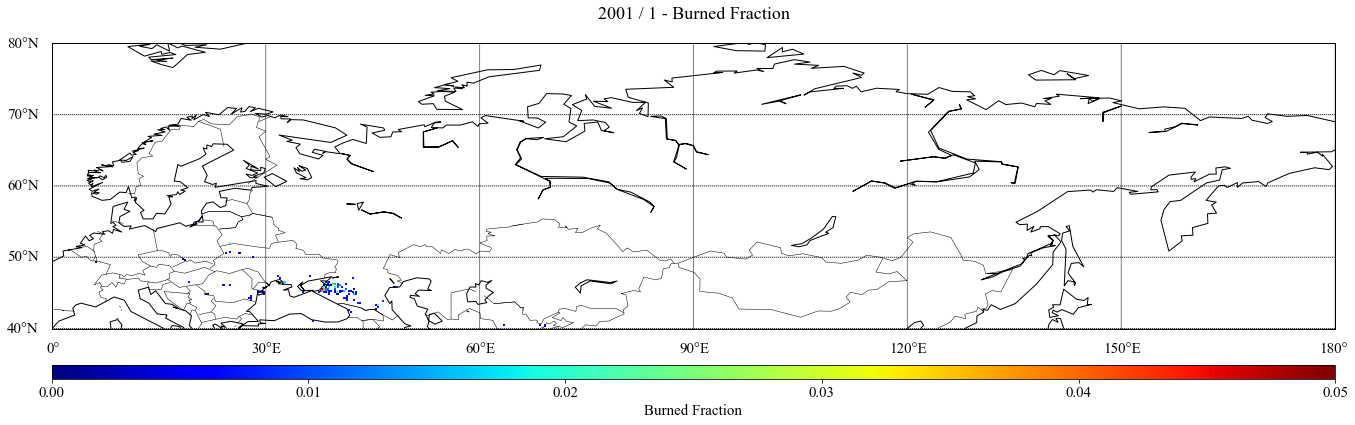

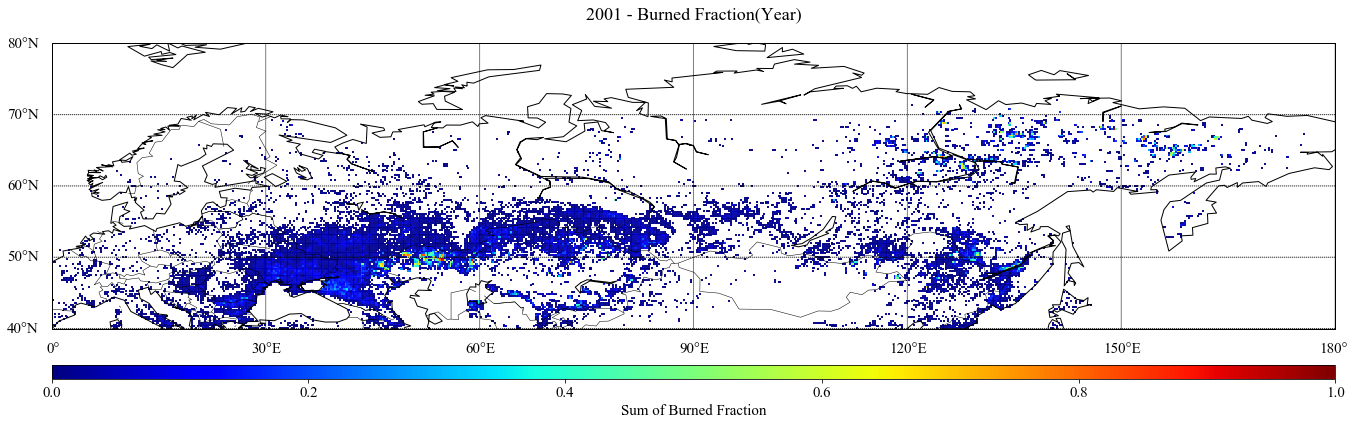

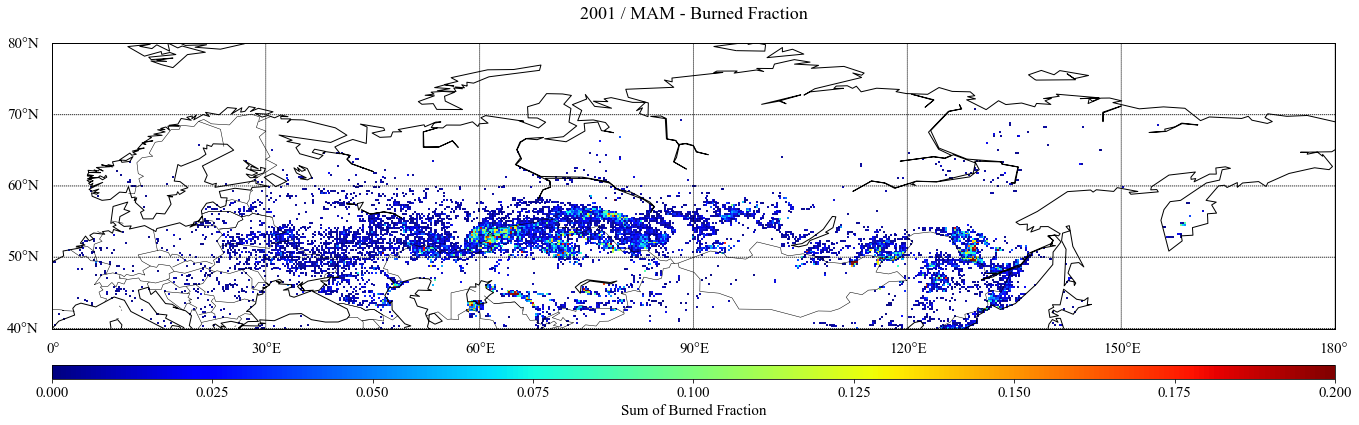

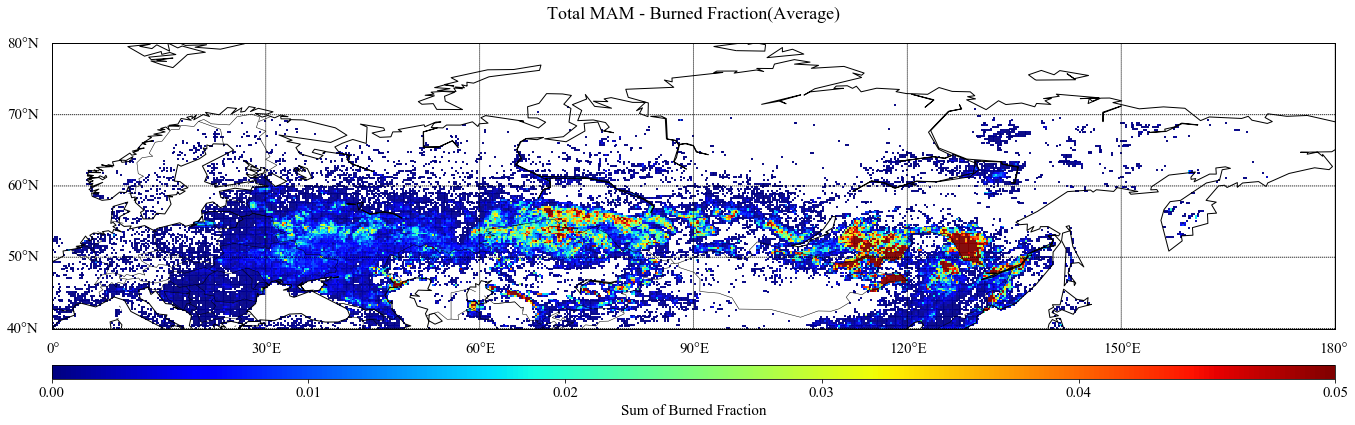

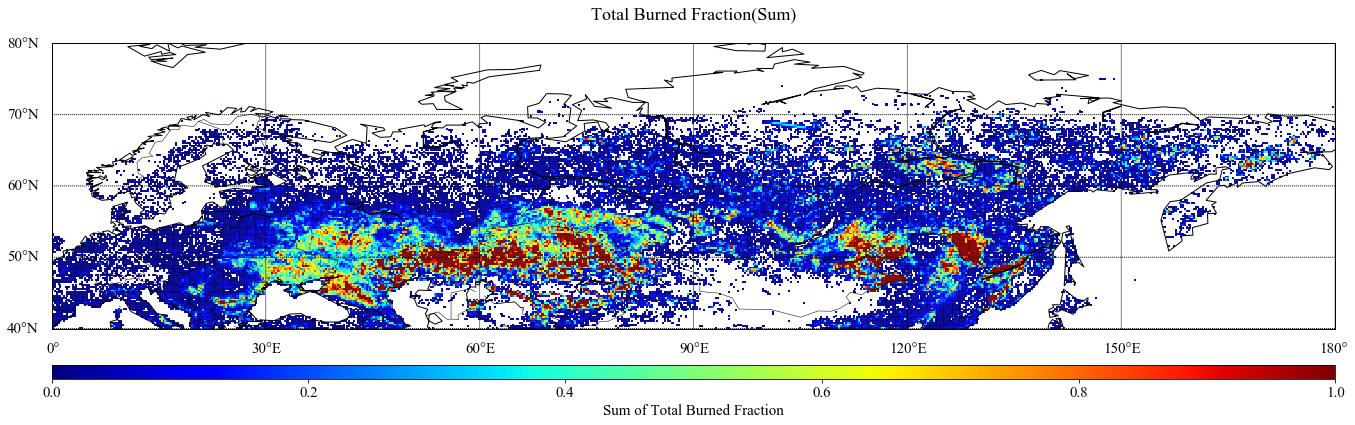

In [8]:
extract_monthly()

extract_yearly()

extract_seasonly()

extract_total_seasonly()

draw_plot_total(total_GFED4_data, 'Total Burned Fraction(Sum)',"Sum of Total Burned Fraction",'Total_SUM_BA')